In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [206]:
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.decomposition import PCA


def read_images_from_folder(folder_path):
    images = []
    labels = []
    persons = os.listdir(folder_path)
    for person in persons:
        person_folder = os.path.join(folder_path, person)
        if not os.path.isdir(person_folder):
            continue
        for file_name in os.listdir(person_folder):
            image_path = os.path.join(person_folder, file_name)
            try:
                image = Image.open(image_path)
                image = image.convert('L')  # Convert to grayscale
                image = image.resize((64, 64))  # Resize if needed
                image = np.array(image).flatten()  # Flatten the image
                images.append(image)
                labels.append(person)
            except Exception as e:
                print(f"Error reading image {image_path}: {str(e)}")
    return np.array(images), np.array(labels)

folder_path = '/content/drive/MyDrive/Proyecto_Final_RP/My_Dataset/PCA_DATASET/lfw_20_exactas_5/'

# Step 1: Read images and convert to feature vectors
images, labels = read_images_from_folder(folder_path)


In [207]:
print("Images.shape ", images.shape)
print("Images: ", images)
print("Labels: ", labels)

i=0
for image, label in zip(images,labels):
  print(image,label,i)
  i+=1

Images.shape  (74, 4096)
Images:  [[210 211 212 ... 163 197 198]
 [213 213 213 ... 182 172 174]
 [208 209 209 ... 182 169 152]
 ...
 [  2   2   5 ...  18  19  16]
 [  0   0   0 ...   0   0   0]
 [ 32  63  61 ...  12   0   0]]
Labels:  ['Shuai_Shen' 'Shuai_Shen' 'Shuai_Shen' 'Shuai_Shen' 'Shuai_Shen'
 'Rodolfo_Keller' 'Rodolfo_Keller' 'Rodolfo_Keller' 'Rodolfo_Keller'
 'Rodolfo_Keller' 'Rodolfo_Keller' 'Rodolfo_Keller' 'Rodolfo_Keller'
 'Rodolfo_Keller' 'Rodolfo_Keller' 'Rodolfo_Keller' 'Rodolfo_Keller'
 'Rodolfo_Keller' 'Rodolfo_Keller' 'Rodolfo_Keller' 'Rodolfo_Keller'
 'Rodolfo_Keller' 'Rodolfo_Keller' 'Rodolfo_Keller' 'Rodolfo_Keller'
 'Rodolfo_Keller' 'Andres_Basile' 'Andres_Basile' 'Andres_Basile'
 'Andres_Basile' 'Andres_Basile' 'Andres_Basile' 'Andres_Basile'
 'Andres_Basile' 'Vicente_Fox' 'Vicente_Fox' 'Vicente_Fox' 'Vicente_Fox'
 'Vicente_Fox' 'Vicente_Fox' 'Vicente_Fox' 'Vicente_Fox' 'Vicente_Fox'
 'Vicente_Fox' 'Vicente_Fox' 'Vicente_Fox' 'Vicente_Fox' 'Vicente_Fox'
 'Vicent

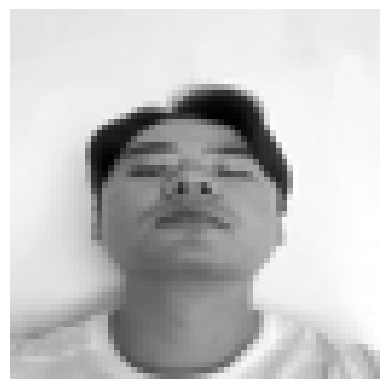

In [208]:
images

image = images[2].reshape((64, 64))

# Display the image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [209]:
import numpy as np
import os
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from time import time

In [210]:
def normalize_data(data):
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data)
    return normalized_data

In [211]:
normalized_data = normalize_data(images)
normalized_data

array([[ 1.39422838,  1.3657333 ,  1.35519105, ...,  0.51853223,
         0.89478027,  0.95773827],
       [ 1.42766456,  1.38801624,  1.36636228, ...,  0.73359309,
         0.61497238,  0.69705733],
       [ 1.3719376 ,  1.34345036,  1.32167735, ...,  0.73359309,
         0.58139543,  0.45809979],
       ...,
       [-0.9240133 , -0.9628337 , -0.9572537 , ..., -1.1227217 ,
        -1.09745194, -1.01909223],
       [-0.94630409, -0.98511663, -1.01310985, ..., -1.32646356,
        -1.31010594, -1.19287953],
       [-0.58965152, -0.28320409, -0.33166478, ..., -1.19063565,
        -1.31010594, -1.19287953]])

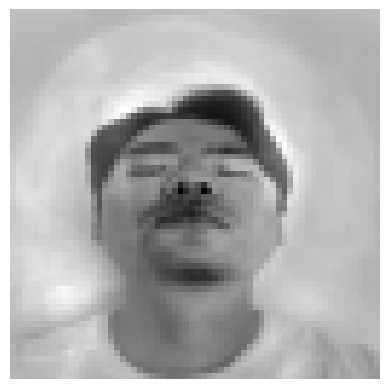

In [212]:
image = normalized_data[2].reshape((64, 64))

# Imagen de Rodolfo normalizada = Imagen Rodolfo - la imagen promedio
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [213]:
pca = PCA(n_components=0.95)  # Retain 95% of the variance
pca.fit(normalized_data)

# Transform the flattened images using the PCA model
transformed_images = pca.transform(normalized_data)

In [214]:
print(len(images))
len(transformed_images)
print(pca)
print(labels)

74
PCA(n_components=0.95)
['Shuai_Shen' 'Shuai_Shen' 'Shuai_Shen' 'Shuai_Shen' 'Shuai_Shen'
 'Rodolfo_Keller' 'Rodolfo_Keller' 'Rodolfo_Keller' 'Rodolfo_Keller'
 'Rodolfo_Keller' 'Rodolfo_Keller' 'Rodolfo_Keller' 'Rodolfo_Keller'
 'Rodolfo_Keller' 'Rodolfo_Keller' 'Rodolfo_Keller' 'Rodolfo_Keller'
 'Rodolfo_Keller' 'Rodolfo_Keller' 'Rodolfo_Keller' 'Rodolfo_Keller'
 'Rodolfo_Keller' 'Rodolfo_Keller' 'Rodolfo_Keller' 'Rodolfo_Keller'
 'Rodolfo_Keller' 'Andres_Basile' 'Andres_Basile' 'Andres_Basile'
 'Andres_Basile' 'Andres_Basile' 'Andres_Basile' 'Andres_Basile'
 'Andres_Basile' 'Vicente_Fox' 'Vicente_Fox' 'Vicente_Fox' 'Vicente_Fox'
 'Vicente_Fox' 'Vicente_Fox' 'Vicente_Fox' 'Vicente_Fox' 'Vicente_Fox'
 'Vicente_Fox' 'Vicente_Fox' 'Vicente_Fox' 'Vicente_Fox' 'Vicente_Fox'
 'Vicente_Fox' 'Vicente_Fox' 'Vicente_Fox' 'Vicente_Fox' 'Vicente_Fox'
 'Vicente_Fox' 'Nestor_Kirchner' 'Nestor_Kirchner' 'Nestor_Kirchner'
 'Nestor_Kirchner' 'Nestor_Kirchner' 'Nestor_Kirchner' 'Nestor_Kirchner'
 'Ne

In [215]:
explained_variance_ratios = pca.explained_variance_ratio_

# Determine the number of components chosen for 0.95 variance
num_components = np.sum(np.cumsum(explained_variance_ratios) < 0.95) + 1

print("Number of components chosen for 0.95 variance:", num_components)

Number of components chosen for 0.95 variance: 40


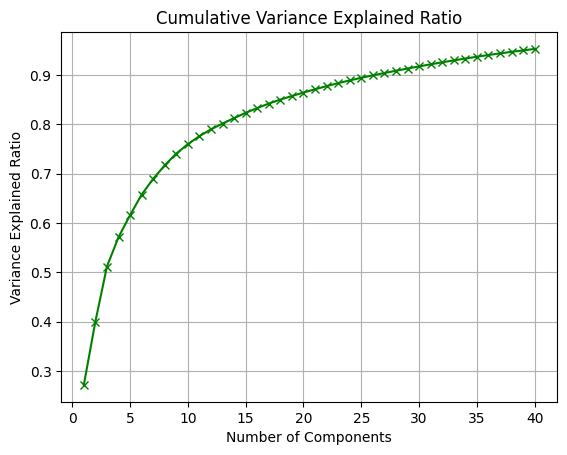

In [216]:
explained_variance_ratio = np.cumsum(explained_variance_ratios)

# Create a range of component numbers
component_numbers = np.arange(1, len(explained_variance_ratio) + 1)

# Plot the variance explained ratio
plt.plot(component_numbers, explained_variance_ratio, marker='x', color='green')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained Ratio')
plt.title('Cumulative Variance Explained Ratio')
plt.grid(True)
plt.show()



Primeros 10 eigenfaces


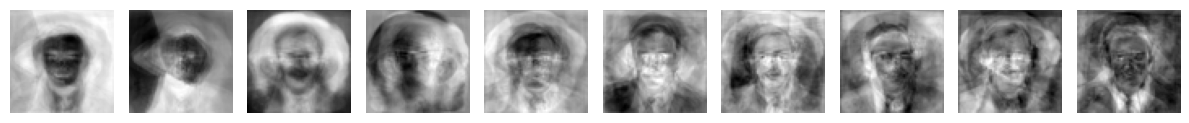

In [217]:
image_size = (64,64)
eigenfaces = pca.components_.reshape(-1, image_size[0], image_size[1])

# Display the first 10 eigenfaces
num_eigenfaces = 10

fig, axes = plt.subplots(nrows=1, ncols=num_eigenfaces, figsize=(12, 4))
for i in range(num_eigenfaces):
    axes[i].imshow(eigenfaces[i], cmap='gray')
    axes[i].axis('off')

print("Primeros 10 eigenfaces")

plt.tight_layout()
plt.show()

Primeros 40 eigenfaces


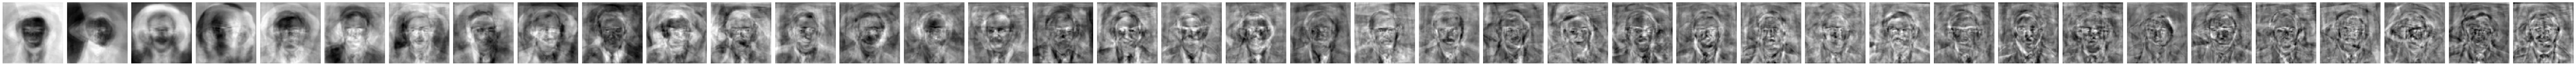

In [220]:
image_size = (64,64)
eigenfaces = pca.components_.reshape(-1, image_size[0], image_size[1])

# Display the first 100 eigenfaces
num_eigenfaces = 40

fig, axes = plt.subplots(nrows=1, ncols=num_eigenfaces, figsize=(100, 100))
for i in range(num_eigenfaces):
    axes[i].imshow(eigenfaces[i], cmap='gray')
    axes[i].axis('off')

print("Primeros 40 eigenfaces")

plt.tight_layout()
plt.show()

In [221]:
print(images.shape)
print(transformed_images.shape)

(74, 4096)
(74, 40)


In [222]:
transformed_images

array([[ 65.56911871, -23.68342674,   8.48589582, ...,  -1.10106663,
          9.32220542,   3.70394168],
       [ 64.08772649, -24.40085298,   4.89778564, ...,  -6.2503702 ,
          8.9207932 ,   0.43474052],
       [ 71.48599319, -22.45673694,   7.47228809, ...,   5.39304812,
         -5.15239016,  -0.47649413],
       ...,
       [-59.08398508,   6.16330171,   9.28645463, ...,   1.49498417,
         -1.78530113,   4.40700818],
       [-31.86504342,   0.16368883,   9.8334937 , ...,   5.46898752,
          4.58077127,  -2.22151876],
       [-33.26519715,  -1.428287  ,  -0.91576741, ...,  -1.92297469,
         -0.20228638,  -7.79478121]])

In [223]:
from sklearn.model_selection import train_test_split

# Split the transformed images and labels into train and test sets
X_train, X_test, y_train, y_test = train_test_split(transformed_images, labels, test_size=0.2, stratify=labels)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (59, 40)
y_train shape: (59,)
X_test shape: (15, 40)
y_test shape: (15,)


In [234]:
print("Ajustando el clasificador al conjunto de entrenamiento.")
t0 = time()
param_grid = {'C': [1e2,1e3, 5e3, 1e4, 5e4, 1e5], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }

# Hacemos uso de una Máquina de Soporte Vectorial como nuestro algoritmo de clasificación
clf = GridSearchCV(	SVC(kernel ='poly', class_weight ='balanced'), param_grid)
clf = clf.fit(X_train, y_train)
print("Realizado en %0.3fs \n" % (time() - t0))
print("El mejor estimador encontrado para la búsqueda:")
print(clf.best_estimator_)

print("\nPrediciendo el nombre de las personas en el conjunto de prueba:")
t0 = time()
y_pred = clf.predict(X_test)
print("Realizado en %0.3fs\n" % (time() - t0))


Ajustando el clasificador al conjunto de entrenamiento.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Realizado en 0.405s 

El mejor estimador encontrado para la búsqueda:
SVC(C=100.0, class_weight='balanced', gamma=0.0001, kernel='poly')

Prediciendo el nombre de las personas en el conjunto de prueba:
Realizado en 0.002s



In [235]:
# target_names = ['Alejandro Toledo', 'Alvaro_Uribe', 'Amelie_Mauresmo',
#        'Andre_Agassi', 'Andres_Basile', 'Angelina_Jolie', 'Ariel_Sharon',
#        'Arnold_Schwarzenegger', 'Atal_Bihari_Vajpayee', 'Bill_Clinton',
#        'Carlos_Menem', 'Colin_Powell', 'David_Beckham', 'Donald_Rumsfeld',
#        'George_Robertson', 'George_W_Bush', 'Gerhard_Schroeder',
#        'Gloria_Macapagal_Arroyo', 'Gray_Davis', 'Guillermo_Coria',
#        'Hamid_Karzai', 'Hans_Blix', 'Hugo_Chavez', 'Igor_Ivanov',
#        'Jack_Straw', 'Jacques_Chirac', 'Jean_Chretien',
#        'Jennifer_Aniston', 'Jennifer_Capriati', 'Jennifer_Lopez',
#        'Jeremy_Greenstock', 'Jiang_Zemin', 'John_Ashcroft',
#        'John_Negroponte', 'Jose_Maria_Aznar', 'Juan_Carlos_Ferrero',
#        'Junichiro_Koizumi', 'Kofi_Annan', 'Laura_Bush',
#        'Lindsay_Davenport', 'Lleyton_Hewitt', 'Luiz_Inacio_Lula_da_Silva',
#        'Mahmoud_Abbas', 'Megawati_Sukarnoputri', 'Michael_Bloomberg',
#        'Naomi_Watts', 'Nestor_Kirchner', 'Paul_Bremer', 'Pete_Sampras',
#        'Recep_Tayyip_Erdogan', 'Ricardo_Lagos', 'Rodolfo_Keller',
#        'Roh_Moo-hyun', 'Rudolph_Giuliani', 'Saddam_Hussein',
#        'Serena_Williams', 'Shuai_Shen', 'Silvio_Berlusconi',
#        'Tiger_Woods', 'Tom_Daschle', 'Tom_Ridge', 'Tony_Blair',
#        'Vicente_Fox', 'Vladimir_Putin', 'Winona_Ryder']

#target_names = ['Andres_Basile',  'Nestor_Kirchner','Rodolfo_Keller', 'Shuai_Shen', 'Vicente_Fox' ]
target_names = ['Shuai_Shen','Rodolfo_Keller','Andres_Basile',  'Vicente_Fox', 'Nestor_Kirchner' ]

#target_names = ['Andres_Basile', 'Rodolfo_Keller', 'Shuai_Shen', 'Carlos_Menem', 'Nestor_Kirchner', 'Vicente_Fox','Tiger_Woods', 'Tom_Daschle', 'Tom_Ridge', 'Tony_Blair' ]


In [247]:
# Matriz Confusión

from sklearn.metrics import ConfusionMatrixDisplay



print(classification_report(y_test, y_pred, target_names=target_names))



                 precision    recall  f1-score   support

     Shuai_Shen       1.00      0.50      0.67         2
 Rodolfo_Keller       0.75      0.75      0.75         4
  Andres_Basile       0.80      1.00      0.89         4
    Vicente_Fox       1.00      1.00      1.00         1
Nestor_Kirchner       0.50      0.50      0.50         4

       accuracy                           0.73        15
      macro avg       0.81      0.75      0.76        15
   weighted avg       0.75      0.73      0.73        15



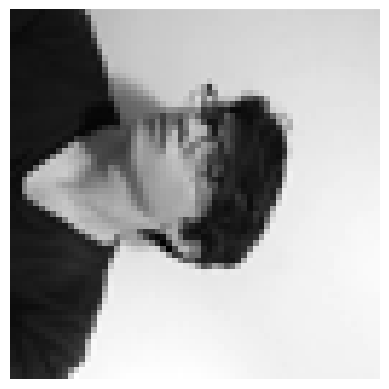

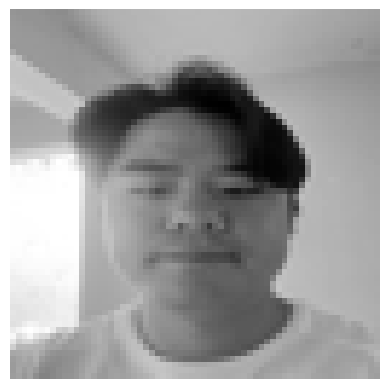

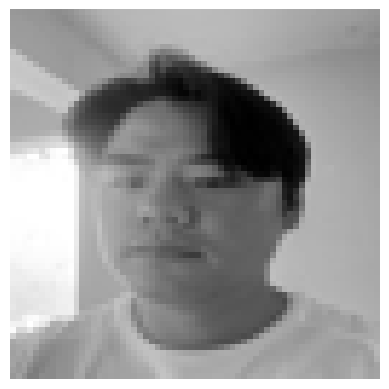

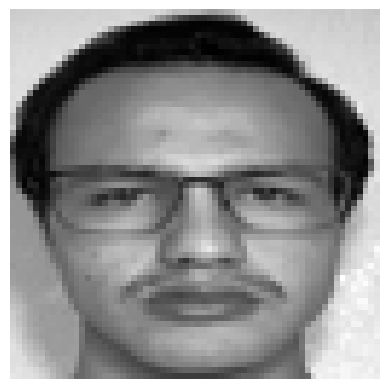

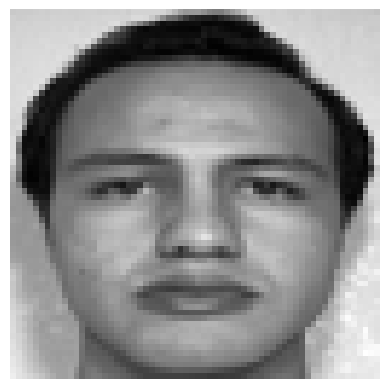

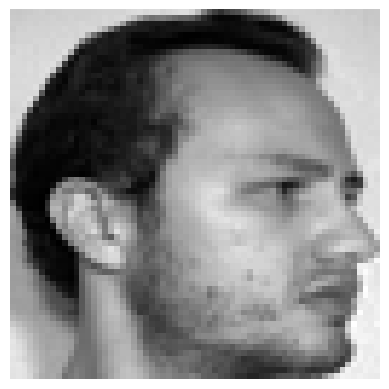

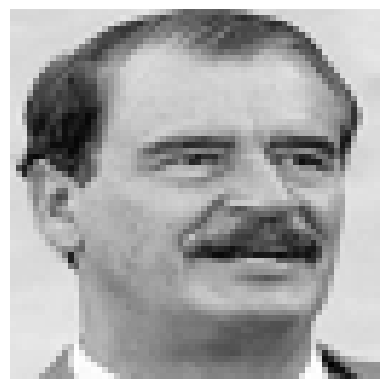

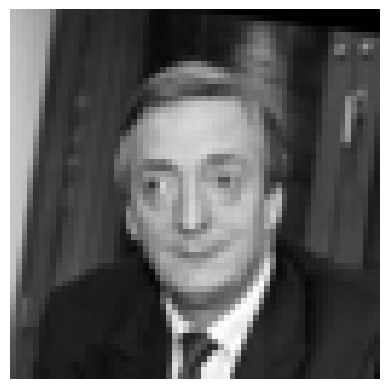

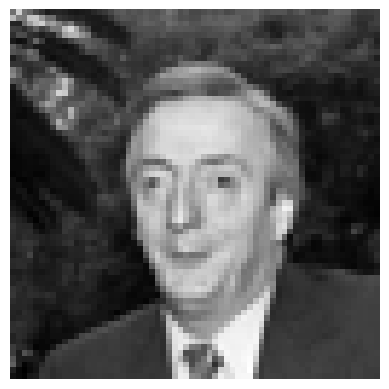

(9, 40)
Clase predicha: ['Andres_Basile' 'Shuai_Shen' 'Rodolfo_Keller' 'Rodolfo_Keller'
 'Rodolfo_Keller' 'Vicente_Fox' 'Vicente_Fox' 'Nestor_Kirchner'
 'Nestor_Kirchner']


In [248]:


# Predicción en una sola imagen
#from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np



folder_path = '/content/drive/MyDrive/Proyecto_Final_RP/Test_Dataset_PCA/'

images_test, labels_test = read_images_from_folder(folder_path)

for image in images_test:
  image.resize((64,64))
  plt.imshow(image, cmap='gray')
  plt.axis('off')
  plt.show()

normalized_data = normalize_data(images_test)


transformed_images = pca.transform(normalized_data)
print(transformed_images.shape)
prediction = clf.predict(transformed_images)
print("Clase predicha:", prediction)



# image = np.array(image).flatten()  # Flatten the image
# print(image.shape)
# #normalized_image = normalize_data(image)
# #normalized_image = np.array(normalized_image)

# print(image.reshape(1,-1).shape)

# image_transformed = pca.transform(image.reshape(1,-1))
# print(image_transformed.shape)

# #show_image = image_transformed.reshape((64, 64))

# prediction = clf.predict(image_transformed)





# Clasificación con MLP

In [238]:
from sklearn.neural_network import MLPClassifier

In [244]:
clf = MLPClassifier(hidden_layer_sizes=(512,), batch_size=32, verbose=False, early_stopping=True).fit(X_train, y_train)

In [245]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

     Shuai_Shen       1.00      0.50      0.67         2
 Rodolfo_Keller       0.75      0.75      0.75         4
  Andres_Basile       0.80      1.00      0.89         4
    Vicente_Fox       1.00      1.00      1.00         1
Nestor_Kirchner       0.50      0.50      0.50         4

       accuracy                           0.73        15
      macro avg       0.81      0.75      0.76        15
   weighted avg       0.75      0.73      0.73        15



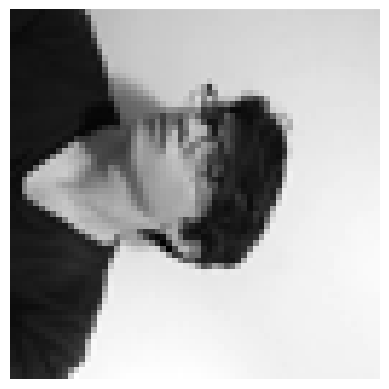

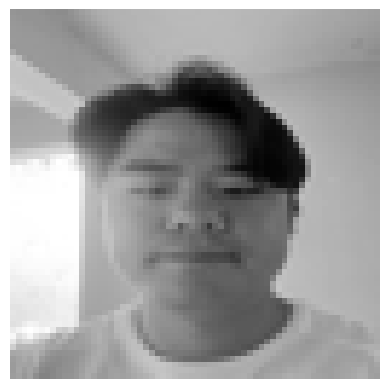

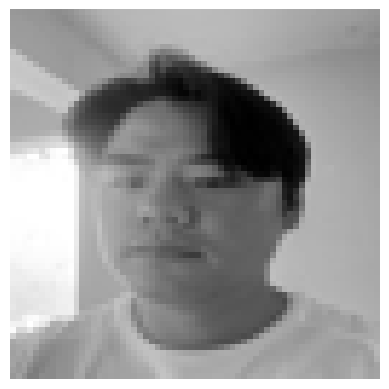

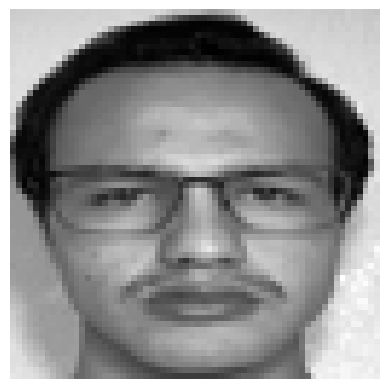

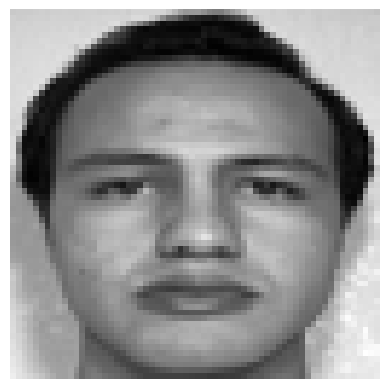

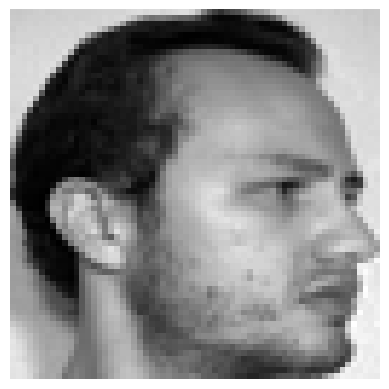

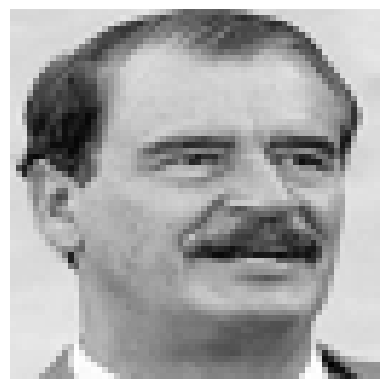

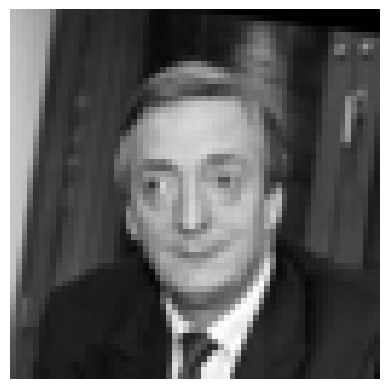

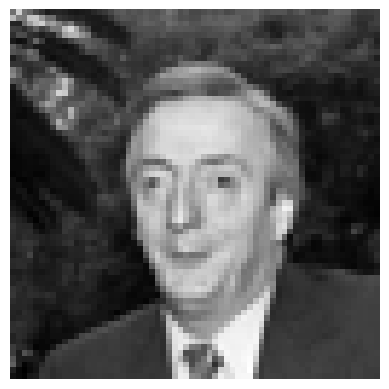

(9, 40)
Clase predicha: ['Andres_Basile' 'Shuai_Shen' 'Rodolfo_Keller' 'Rodolfo_Keller'
 'Rodolfo_Keller' 'Vicente_Fox' 'Vicente_Fox' 'Nestor_Kirchner'
 'Nestor_Kirchner']


In [246]:
import numpy as np



folder_path = '/content/drive/MyDrive/Proyecto_Final_RP/Test_Dataset_PCA/'

images_test, labels_test = read_images_from_folder(folder_path)

for image in images_test:
  image.resize((64,64))
  plt.imshow(image, cmap='gray')
  plt.axis('off')
  plt.show()

normalized_data = normalize_data(images_test)


transformed_images = pca.transform(normalized_data)
print(transformed_images.shape)
prediction = clf.predict(transformed_images)
print("Clase predicha:", prediction)
